# Loan investment in Lending Club Analysis



Template of the project is in the CRISP-DM framework. 


##  Business Understanding and Data Understanding



## Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective.
### Lending Club

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It is the world's largest peer-to-peer lending platform.

LendingClub enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose, with the minimum investment of $25 per note. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.




## Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.


### Data File

The data file **lending_club_2007_2011_6_states.csv** contains the loan and borrower information for loans initiated from 2007 to 2011 in six states, California, New York, Florida, Texas, New Jersey and Illinois.

The data dictionary file **data_dictionary.csv** contains descriptions of all the columns in the data file.

In [87]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#display all dataframe columns in df.head()
pd.options.display.max_columns = None
#display long string in datafame
pd.options.display.max_colwidth = 300

#filter out warning messages
import warnings
warnings.filterwarnings('ignore')



###  Loading the Data Dictionary and the Data File


In [88]:
cd C:\Users\Aayush\Desktop\python\capstone

C:\Users\Aayush\Desktop\python\capstone


In [89]:
data_dict=pd.read_csv('data_dictionary.csv')
data_dict

,ColumnName,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The self-reported annual income provided by the borrower during registration.
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,chargeoff_within_12_mths,Number of charge-offs within 12 months
5,collection_recovery_fee,post charge off collection fee
6,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
7,debt_settlement_flag,"Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company."
8,debt_settlement_flag_date,The most recent date that the Debt_Settlement_Flag has been set
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [90]:
loan_df = pd.read_csv('lending_club_2007_2011_6_states.csv')
loan_df.head(5)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


In [91]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    19908 non-null  int64  
 1   funded_amnt                  19908 non-null  int64  
 2   funded_amnt_inv              19908 non-null  float64
 3   term                         19908 non-null  object 
 4   int_rate                     19908 non-null  float64
 5   installment                  19908 non-null  float64
 6   grade                        19908 non-null  object 
 7   sub_grade                    19908 non-null  object 
 8   emp_title                    18723 non-null  object 
 9   emp_length                   19409 non-null  object 
 10  home_ownership               19908 non-null  object 
 11  annual_inc                   19908 non-null  float64
 12  verification_status          19908 non-null  object 
 13  issue_d         

In [92]:
loan_df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       1185
emp_length                       499
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                              5
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq         12910
mths_since_last_record         18699
open_acc                           0
p

In [93]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,6998.000000,1209.000000,19908.000000,19908.000000,19908.000000,19889.000000,19908.000000,19908.0,19908.0,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,0.0,19893.0,0.0,19908.0,19908.0,19893.0,19908.0,19595.000000,19898.0
mean,11353.846444,11065.763763,10500.929748,12.089717,330.614254,7.107345e+04,13.008619,0.143962,0.829466,35.841097,69.354839,9.278782,0.046715,13363.994826,49.424966,21.527627,0.0,0.0,12286.852391,11690.155107,9913.519990,2277.120129,1.489973,94.722382,11.861625,2636.253711,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.037969,0.0
std,7463.700492,7176.276661,7106.229650,3.698287,210.557434,6.980565e+04,6.663658,0.489576,1.044978,21.599170,44.520279,4.414903,0.217827,15943.303849,28.198395,11.269006,0.0,0.0,9098.847567,8984.722396,7126.424699,2583.733214,7.964257,666.434583,141.910324,4412.964304,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.191393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5750.000000,5600.000000,5000.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,0.000000,19.000000,0.000000,6.000000,0.000000,3770.500000,26.500000,13.000000,0.0,0.0,5670.592545,5239.857500,4800.000000,687.595000,0.000000,0.000000,0.000000,222.530000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,10000.000000,9000.000000,11.860000,285.780000,6.000000e+04,13.075000,0.000000,0.000000,34.000000,90.000000,9.000000,0.000000,8876.500000,50.300000,20.000000,0.0,0.0,10042.735817,9427.845000,8000.000000,1389.230000,0.000000,0.000000,0.000000,544.700000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14500.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,1.000000,51.000000,104.000000,12.000000,0.000000,16952.250000,72.800000,28.000000,0.0,0.0,16681.688450,15983.440000,14000.000000,2842.795000,0.000000,0.000000,0.000000,3193.352500,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,8.000000,106.000000,129.000000,44.000000,3.000000,148829.000000,99.900000,90.000000,0.0,0.0,58480.139915,58438.370000,35000.020000,23480.140000,180.200000,29623.350000,6543.040000,35596.410000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,2.000000,0.0


### Exploratory Data Analysis - EDA


### Loan Term and Interest Rate



With the help of following code cells, we find out that:
- There are two different terms, 36 months and 60 months.
- There are about three times more 36 months loans than 60 months loans in the dataset.
- Interest rate is in the range of 5% to 25%. Majority of loans have interest rate between 5-17%.
- 36 months loans have significant lower average interest rate than that of 60 months loans.

#### Loan Term

In [94]:
#Get unique values in the term feature
loan_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [95]:
#Get counts of each term
loan_df.term.value_counts()

36 months    14852
60 months     5056
Name: term, dtype: int64

Text(0.5, 1.0, 'Loan Term')

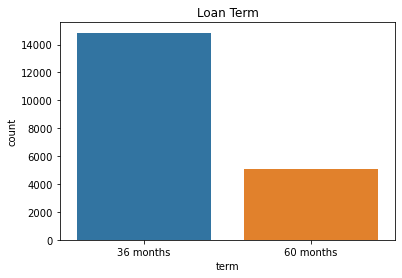

In [96]:
ax = sns.countplot('term',data=loan_df, order=sorted(loan_df.term.unique()))
ax.set_title('Loan Term')

#### Interest Rate

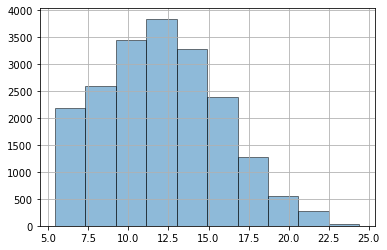

In [97]:
loan_df.int_rate.hist(edgecolor='black', alpha=0.5)

#### Average Interest Rate of Different Terms

In [98]:
loan_df.groupby('term').agg({'int_rate':'mean'})

,int_rate
term,
36 months,11.121125
60 months,14.934955


Text(0, 0.5, 'Interest Rate')

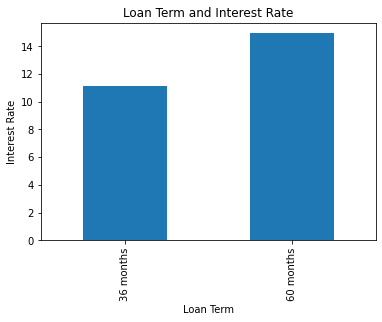

In [99]:
ax = loan_df.groupby('term').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Loan Term and Interest Rate')
ax.set_xlabel('Loan Term')
ax.set_ylabel('Interest Rate')

### Loan Grade


- grade is a categorical feature.
- A Seaborn countplot is a good way to visualize categorical features.


In [100]:
loan_df.grade.unique()

array(['C', 'E', 'F', 'B', 'A', 'D', 'G'], dtype=object)

In [101]:
loan_df.grade.value_counts()

B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: grade, dtype: int64

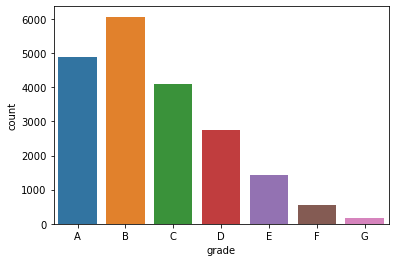

In [102]:
grd= sns.countplot("grade",data=loan_df,order=sorted(loan_df.grade.unique()))

### Loan Grade and Interest Rate


 - Group by grade column.
 - aggregate function mean on int_rate column.


In [103]:
loan_df.groupby('grade').agg({'int_rate':'mean'})


,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


Text(0, 0.5, 'Interest Rate')

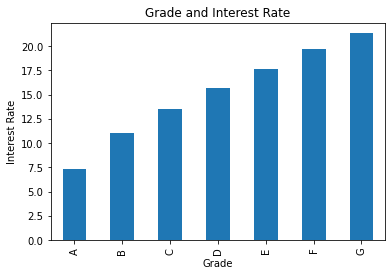

In [104]:
gi=loan_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar(legend = False)
gi.set_title('Grade and Interest Rate')
gi.set_xlabel('Grade')
gi.set_ylabel('Interest Rate')

In [105]:
### interest rate increases with grade in a linear fashion

###  Loan by State

There are loans from six States in the dataset. 



In [106]:
loan_df.addr_state.unique()


array(['IL', 'CA', 'TX', 'FL', 'NY', 'NJ'], dtype=object)

In [107]:
loan_df.addr_state.value_counts()

CA    7105
NY    3817
FL    2872
TX    2734
NJ    1855
IL    1525
Name: addr_state, dtype: int64

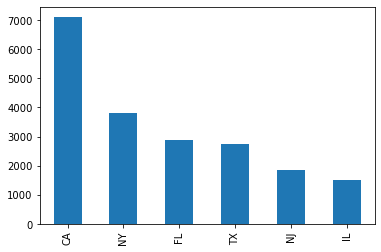

In [108]:
si=loan_df.addr_state.value_counts().plot.bar()

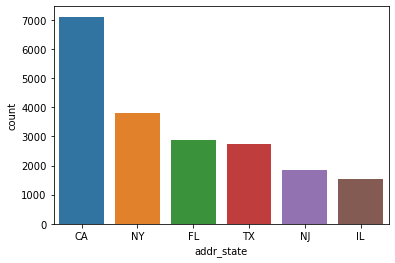

In [109]:
si=sns.countplot('addr_state',data=loan_df,order=loan_df.addr_state.value_counts().index)

###  Borrowers Annual Income Distribution


In [110]:
z=loan_df.annual_inc.unique()
len(z)

2996

(array([1.600e+01, 2.660e+02, 7.930e+02, 1.487e+03, 2.167e+03, 2.098e+03,
        2.467e+03, 2.285e+03, 1.463e+03, 1.473e+03, 8.960e+02, 9.510e+02,
        8.050e+02, 4.000e+02, 5.470e+02, 3.650e+02, 1.580e+02, 1.860e+02,
        2.310e+02, 1.290e+02, 9.100e+01, 7.300e+01, 1.010e+02, 5.300e+01,
        9.200e+01, 2.000e+01, 2.000e+01, 2.600e+01, 2.500e+01, 2.100e+01,
        3.600e+01, 9.000e+00, 3.000e+00, 1.400e+01, 9.000e+00, 8.000e+00,
        3.100e+01, 5.000e+00, 4.000e+00, 9.000e+00, 3.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 3.000e+00,
        7.000e+00]),
 array([     0.        ,   8163.26530612,  16326.53061224,  24489.79591837,
         32653.06122449,  40816.32653061,  48979.59183673,  57142.85714286,
         65306.12244898,  73469.3877551 ,  81632.65306122,  89795.91836735,
         97959.18367347, 106122.44897959, 114285.71428571, 122448.97959184,
        130612.24489796, 138775.51020408, 146938.7755102 , 155102.04081633,
       

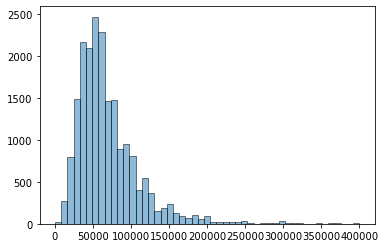

In [111]:
bins = np.linspace(0, 400000, 50)
plt.hist(loan_df.annual_inc,bins=bins,edgecolor='black',alpha=0.5)

(array([  16.,  266.,  793., 1487., 2167., 2098., 2467., 2285., 1463.,
        1473.,  896.,  951.,  805.,  400.,  547.,  365.,  158.,  186.,
         231.,  129.,   91.,   73.,  101.,   53.,   92.,   20.,   20.,
          26.,   25.,   21.,    7.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]),
 array([     0.        ,   8163.26530612,  16326.53061224,  24489.79591837,
         32653.06122449,  40816.32653061,  48979.59183673,  57142.85714286,
         65306.12244898,  73469.3877551 ,  81632.65306122,  89795.91836735,
         97959.18367347, 106122.44897959, 114285.71428571, 122448.97959184,
        130612.24489796, 138775.51020408, 146938.7755102 , 155102.04081633,
        163265.30612245, 171428.57142857, 179591.83673469, 187755.10204082,
        195918.36734694, 204081.63265306, 212244.89795918, 220408.16326531,
        228571.42857143, 236734.69387755, 244897.95918367, 253061.2244898 ,

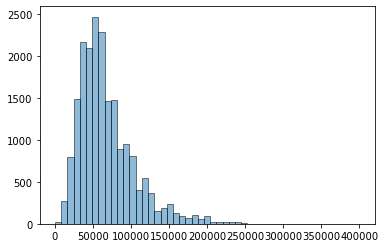

In [112]:

ai_new=loan_df[loan_df.annual_inc<250000]
plt.hist(ai_new.annual_inc,bins=bins,edgecolor='black',alpha=0.5)

###  Borrower Annual Income by State


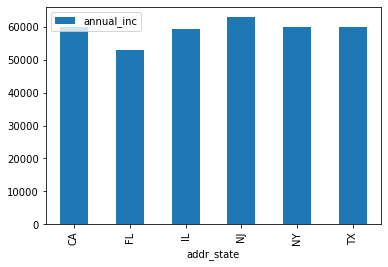

In [113]:
med_inc=loan_df.groupby('addr_state').agg({'annual_inc':'median'}).plot.bar()

In [114]:
#NJ has highest median annual income and FL has the lowest

###  Annual Income and Interest Rate



(4.0, 26.0)

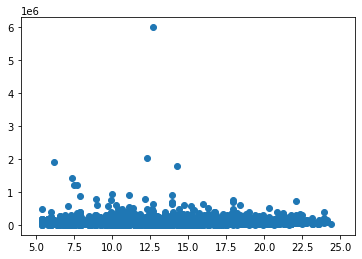

In [115]:
y1=loan_df['annual_inc']
x1=loan_df['int_rate']
plt.scatter(x1,y1)
plt.xlim(4,26)



In [116]:
y2=loan_df[loan_df['annual_inc']<300000]
y2.shape

(19785, 58)

(4.0, 26.0)

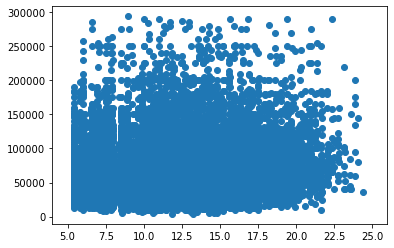

In [117]:
an_n=loan_df[loan_df['annual_inc']<300000]
y2=an_n['annual_inc']
x2=an_n['int_rate']
plt.scatter(x2,y2)
plt.xlim(4,26)



In [118]:
r=np.corrcoef(x2,y2)
r

array([[1.        , 0.06743336],
       [0.06743336, 1.        ]])

In [119]:
#not significant correlation is observed

###  Convert Date Column



In [120]:
loan_df['issue_d']

0        Dec-2011
1        Dec-2011
2        Dec-2011
3        Dec-2011
4        Dec-2011
           ...   
19903    Jul-2007
19904    Jul-2007
19905    Jul-2007
19906    Jul-2007
19907    Jul-2007
Name: issue_d, Length: 19908, dtype: object

In [121]:
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'])
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
19903   2007-07-01
19904   2007-07-01
19905   2007-07-01
19906   2007-07-01
19907   2007-07-01
Name: issue_d, Length: 19908, dtype: datetime64[ns]

In [122]:
loan_df['issue_year']= pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

### Loan Issued Over Year


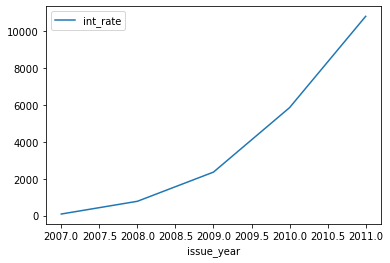

In [123]:
ax = loan_df.groupby('issue_year').agg({'int_rate':'count'}).plot.line()


#.agg(['issue_year','count']).plot.line()

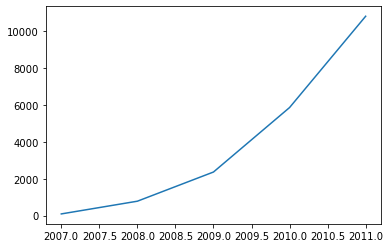

In [124]:
loan_df.issue_year.value_counts().plot(kind='line')


###  Interest Rate Change



In [223]:
table=pd.pivot_table(loan_df,values='int_rate',index=['issue_year'],columns=['addr_state'])
table

addr_state,CA,FL,IL,NJ,NY,TX
issue_year,,,,,,
2007,10.338000,10.616538,8.540000,10.698667,11.145250,8.225000
2008,11.472444,10.935263,11.194833,11.430143,11.187348,10.927321
2009,12.232144,12.191182,11.966685,12.199434,12.479330,12.403735
2010,12.001526,11.643762,11.694765,12.122847,11.846824,11.757327
2011,12.236692,12.152918,12.281881,12.386044,12.221262,12.214518


### Loan Status

The loans in the dataset were issued before 2011 and the longest loan term is 5 years. So all the loans are either paid off or charged off.


$PaidOffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$


In [126]:
a=np.array(loan_df.loan_status.value_counts())

fp=a[0]
co=a[1]
paid_off_rate=fp/(fp+co)
paid_off_rate

0.8521699819168174

### Loan Term and Loan Status



In [225]:
pt_term=pd.pivot_table(loan_df,values=['int_rate'],index=['term'],columns=['loan_status'],aggfunc='count')
pt_term

int_rate           
loan_status Charged Off Fully Paid
term                              
36 months          1728      13124
60 months          1215       3841

In [128]:
a=np.array(pt_term.iloc[0,:])
por36=a[1]/(a[0]+a[1])
b=np.array(pt_term.iloc[1,:])
por60=b[1]/(b[0]+b[1])

por36,por60,a
#more pay off rate in case of 36 month term than 60 month term

(0.8836520333961756, 0.7596914556962026, array([ 1728, 13124], dtype=int64))

###  Loan Grade and Loan Status



In [129]:
pt_grade=pd.pivot_table(loan_df,values='int_rate',index=['grade'],columns=['loan_status'],aggfunc='count')
pt_grade

loan_status,Charged Off,Fully Paid
grade,,
A,304,4571
B,779,5286
C,672,3415
D,579,2169
E,378,1056
F,174,366
G,57,102


In [130]:
ga=np.array(pt_grade.iloc[0,:])
por_ga=ga[1]/(ga[0]+ga[1])
gb=np.array(pt_grade.iloc[1,:])
por_gb=gb[1]/(gb[0]+gb[1])
gc=np.array(pt_grade.iloc[:,1])
por_gc=gb[1]/(gc[0]+gc[1])
gd=np.array(pt_grade.iloc[3,:])
por_gd=gd[1]/(gd[0]+gd[1])
ge=np.array(pt_grade.iloc[4,:])
por_ge=ge[1]/(ge[0]+ge[1])
gf=np.array(pt_grade.iloc[5,:])
por_gf=gf[1]/(gf[0]+gf[1])
gg=np.array(pt_grade.iloc[6,:])
por_gg=gg[1]/(gg[0]+gg[1])
por_ga,por_gb,por_gc,por_gd,por_ge,por_gf


(0.9376410256410257,
 0.871558120362737,
 0.5362686415745156,
 0.7893013100436681,
 0.7364016736401674,
 0.6777777777777778)

In [131]:
#highest pay off rate in grade A and lowest in grade C



## Data Preparation, Modeling and Model Evaluation

### Loan Status

The dataset has loans initiated from 2007 to 2011. All loans have been either fully paid or charged off. So we will create a 'repaid' column in loan_df by encoding loan status and map Charged Off to 0 and Fully Paid to 1. 



In [132]:
loan_df.loan_status.value_counts()

Fully Paid     16965
Charged Off     2943
Name: loan_status, dtype: int64

In [133]:
mapping_dict = {'Charged Off':0, 'Fully Paid':1}
loan_df['repaid'] = loan_df.loan_status.map(mapping_dict)
loan_df.repaid.value_counts()

1    16965
0     2943
Name: repaid, dtype: int64

### Paid Off Rate
With the newly created repaid column, we can calculate paid-off rate of all the loans in the dataset with the mean value of the column, which is about 85%, as shown in the next code cell.

In [134]:
loan_df.repaid.mean()

0.8521699819168174


###  Loan Term in Year



In [172]:
loan_df['loan_term_year']=loan_df.term.map({'36 months':3,'60 months':5})
loan_df['loan_term_year']

0        3
1        3
2        3
3        5
4        5
        ..
19903    3
19904    3
19905    3
19906    3
19907    3
Name: loan_term_year, Length: 19908, dtype: int64

In [173]:
loan_df.groupby('loan_term_year').agg({'repaid':'mean'})

,repaid
loan_term_year,
3,0.883652
5,0.759691


###  Encode Categorical Features



In [174]:
#relationship between purpose and repaid rate
loan_df.groupby('purpose').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
purpose,,
small_business,0.728177,905
educational,0.801242,161
house,0.823864,176
moving,0.829653,317
other,0.843689,2060
debt_consolidation,0.845670,9389
medical,0.854286,350
vacation,0.859296,199
renewable_energy,0.862745,51


In [175]:
#encode purpose to create purpose_code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
loan_df['purpose_code'] = le.fit_transform(loan_df['purpose'])
loan_df['purpose_code'].unique()

array([11,  9,  0,  2,  1,  4,  6,  8,  7,  5, 12, 13, 10,  3])

In [176]:
loan_df.groupby('grade').agg({'repaid':'mean','issue_d':'count'}).sort_values(by='repaid')



,repaid,issue_d
grade,,
G,0.641509,159
F,0.677778,540
E,0.736402,1434
D,0.789301,2748
C,0.835576,4087
B,0.871558,6065
A,0.937641,4875


In [177]:
le1 = LabelEncoder()
loan_df['grade_code'] = le1.fit_transform(loan_df['grade'])


In [178]:
loan_df.groupby('addr_state').agg({'repaid':'mean','issue_d':'count'}).sort_values(by='repaid')



,repaid,issue_d
addr_state,,
FL,0.822772,2872
CA,0.840816,7105
NJ,0.847978,1855
NY,0.868745,3817
IL,0.870164,1525
TX,0.882224,2734


In [179]:
le2 = LabelEncoder()
loan_df['addr_state_code'] = le2.fit_transform(loan_df['addr_state'])


In [180]:
loan_df.groupby('home_ownership').agg({'repaid':'mean','issue_d':'count'}).sort_values(by='repaid')


,repaid,issue_d
home_ownership,,
OTHER,0.818182,44
OWN,0.841527,1546
RENT,0.847620,10966
MORTGAGE,0.861379,7351
NONE,1.000000,1


In [181]:
le2 = LabelEncoder()
loan_df['home_ownership_code'] = le2.fit_transform(loan_df['home_ownership'])

###  Manage Missing Values



In [182]:
loan_df.revol_util.value_counts()

0.00     455
0.20      38
78.70     34
32.00     34
28.90     33
        ... 
58.77      1
21.59      1
0.05       1
25.74      1
37.63      1
Name: revol_util, Length: 1053, dtype: int64

In [183]:
mean=loan_df.revol_util.mean()

In [184]:
mean

49.424966061641975

In [185]:


loan_df['revol_util']=loan_df['revol_util'].fillna(mean)
loan_df['revol_util'].describe()

count    19908.000000
mean        49.424966
std         28.184935
min          0.000000
25%         26.500000
50%         50.200000
75%         72.800000
max         99.900000
Name: revol_util, dtype: float64

In [186]:

loan_df['pub_rec_bankruptcies'].describe()

count    19908.000000
mean         0.814447
std          6.146785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.424966
Name: pub_rec_bankruptcies, dtype: float64

In [187]:
mode=loan_df.revol_util.mean()

In [188]:

loan_df.pub_rec_bankruptcies.fillna(value=mode,inplace=True)

loan_df['pub_rec_bankruptcies'].describe()

count    19908.000000
mean         0.814447
std          6.146785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.424966
Name: pub_rec_bankruptcies, dtype: float64

## Modeling and Model Evaluation

Construct a classification model to predict whether a loan will be fully paid. Column 'repaid' will be the label. The purpose of the model is to identify loans that are likely to be fully paid.

steps:
- Identify columns we need for modeling and the next steps. 
- Create a clean DataFrame `df` with needed columns only.
- Split the DataFrame to train and test.
- Identify columns needed to train the classification model.
- Create train and test set for the classification model.
- Create train and test label for the classification model.
- Train the classification model.
- Predict with the classification model.
- Evaluate the classification model.



### Keep Columns

clean DataFrame `df` which keeps following columns in the original DataFrame `loan_df`.
- funded_amnt
- loan_term_year
- int_rate
- grade_code
- purpose_code
- addr_state_code
- home_ownership_code
- annual_inc
- dti
- revol_util
- pub_rec_bankruptcies
- repaid
- total_pymnt

Among all keeped columns, repaid will be the label, total_pymnt will be used to calculate portfolio return in the next step. Other featues will be used to train classification models.

Only features that are available before the loan is initiated can be used in the classification. Features like recoveries, total_rec_prncp, which are only available after the loan is closed, should not be included in the training features. If your classfication achieves close to 100% accuracy rate, it's likely that you include features that are only avaiable after the loan is closed.


In [189]:
#columns needed for the classification AND the next steps
keep_columns = ['funded_amnt', 'loan_term_year', 'int_rate', 'grade_code', 'purpose_code', 
                'addr_state_code', 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 
                'pub_rec_bankruptcies', 'repaid', 'total_pymnt']

In [190]:
#Create a clean DataFrame
df = loan_df[keep_columns].copy()

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           19908 non-null  int64  
 1   loan_term_year        19908 non-null  int64  
 2   int_rate              19908 non-null  float64
 3   grade_code            19908 non-null  int32  
 4   purpose_code          19908 non-null  int32  
 5   addr_state_code       19908 non-null  int32  
 6   home_ownership_code   19908 non-null  int32  
 7   annual_inc            19908 non-null  float64
 8   dti                   19908 non-null  float64
 9   revol_util            19908 non-null  float64
 10  pub_rec_bankruptcies  19908 non-null  float64
 11  repaid                19908 non-null  int64  
 12  total_pymnt           19908 non-null  float64
dtypes: float64(6), int32(4), int64(3)
memory usage: 1.7 MB


### Split DataFrame to Train and Test




In [192]:
#columns for the classification
model_columns = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc', 
                 'dti', 'revol_util', 'pub_rec_bankruptcies']

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)
d_train = df_train[model_columns]
d_test = df_test[model_columns]
l_train = df_train.repaid
l_test = df_test.repaid

### Random Forest Classifier


The first classifier achieve accuracy rate 83.5%, which is actually worse than the zero model. A zero model always predicts with the majority class, which is 1 in the dataset. Since the overal repaid rate is 85.2%, so the accuracy rate of the zero model is 85.2%.

In this project, the accuracy rate is not what we are looking for. The purpose of the classification model is to help us select loans that are more likely to be repaid. So our focus is on the precision rate of class 1. From the classification report of the first model, we can see that the precision rate of class 1 is 0.86, or 86%. This means among all the loans identified as to be fully paid by the classification model, 86% of them are actually fully paid. This is a not much better than the repaid rate of the whole test set, which is about 85%. The reason is that the model only has 0.07 recall rate on class 0, which means, for all loans that are charged off, the model only identifies 7% of them as charged off.

The dataset is highly imbalanced, with 85% class 1 and 15% class 0, we can achieve better class 1 precision by setting balanced class_weight. In the second model, we set `class_weight='balanced'`. The default RandomForestClassifier is not very senstive to class_weight change, so we also limit `max_depth` to increase the effectiveness of class_weight change.

From the classification report of the second Random Forest Classifier, we can see that even though the accuracy rate drops to 65%, the model has a lot larger class 0 recall at 0.44. It means the model identifies 44% of all charged off loans correctly. More importantly, we get better class 1 precission, 88%, which means, among all loans that are predicted as to be fully paid by the model, 88% of them are actually fully paid.



In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create Regressor with default properties
rfc1 = RandomForestClassifier(random_state=23)

# Fit estimator and display score
rfc1 = rfc1.fit(d_train, l_train)
print(f'Accuracy Score: {rfc1.score(d_test, l_test)}')
pred = rfc1.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.8495730788548468
Confusion Matrix:
[[  11 1175]
 [  23 6755]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.01      0.02      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.59      0.50      0.47      7964
weighted avg       0.77      0.85      0.78      7964



In [194]:
#zero model accuracy
df_test.repaid.mean()

0.8510798593671521

In [195]:
rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc2 = rfc2.fit(d_train, l_train)
print(f'Accuracy Score: {rfc2.score(d_test, l_test)}')
pred = rfc2.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.6813159216474134
Confusion Matrix:
[[ 527  659]
 [1879 4899]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.44      0.29      1186
           1       0.88      0.72      0.79      6778

    accuracy                           0.68      7964
   macro avg       0.55      0.58      0.54      7964
weighted avg       0.78      0.68      0.72      7964



### Logistic Regression with Default Class Weight



In [196]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=1E6)
logreg=logreg.fit(d_train,l_train)
predicted=logreg.predict(d_test)
score1=logreg.score(d_test, l_test)
print(f'score={100*score1:4.3f}%')

score=85.108%


In [197]:
print('Classification Report:')
print(metrics.classification_report(l_test, predicted))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.43      0.50      0.46      7964
weighted avg       0.72      0.85      0.78      7964



In [227]:
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, predicted)}')

Confusion Matrix:
[[   0 1186]
 [   0 6778]]


###  Logistic Regression with Balanced Class Weight



In [198]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=1E6, class_weight='balanced')
logreg=logreg.fit(d_train,l_train)
predicted2=logreg.predict(d_test)
score2=logreg.score(d_test,l_test)
print(f'score={100*score2:4.3f}%')

score=48.393%


In [199]:
#accuracy decreased

In [200]:
 
print('Classification Report:')
print(metrics.classification_report(l_test, predicted2))

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.72      0.29      1186
           1       0.90      0.44      0.59      6778

    accuracy                           0.48      7964
   macro avg       0.54      0.58      0.44      7964
weighted avg       0.79      0.48      0.55      7964



In [226]:
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, predicted2)}')

Confusion Matrix:
[[ 857  329]
 [3781 2997]]


In [201]:
###  good model as precision for class 1 has increased which was our objective


## Module 3: Construct Loan Portfolio

Construct loan portfolio out of the test set with the help of our classification model. 

### Portfolio Annual Return

Calculation of loan return is very complicated since the loan is paid by monthly installments. In this project, we simplify the calculation by using the total payment and funded amount. We can use following formula to calculate the total return:

$TotalReturn = \frac{Total Payment}{Funded Amount} - 1$

The total return doesn't reflect loan profitability since loans have different terms. It's more accurate to compare annual returns. There are only two terms in the dataset, 36 months and 60 months. The formula to calculate annual return is:

$Annualized Return = (1+Total Return)^{(1/years)} - 1$. 

For example, if total return of a 36 month loan is 10%, then annualized return = `(1 + 0.1)**(1/3) - 1` = `0.032`.

This is not the true annualized return of a loan. But the goal of this project is to identify loans to invest, so we just need a benchmark to evaluate loan portfolio performance.

In the following code cells, we define a function to calculate annual return of a loan portfolio. The function calculates annual return for 36 month and 60 month loans in a portfolio separately. 

Then we use the `get_portfolio_annual_return()` function to find out the annual returns of all 36 months and 60 months loans in the test dataset. There are 5960 36 months loans, with annual return 2.69%, and 2004 60 months loans, with annual return 2.74%.



In [203]:
def get_portfolio_annual_return(df):
    '''
    Get annual return of 36 and 60 month loans in the portfolio df.
    '''
    annual_return_36, annual_return_60 = 0, 0
    df_36 = df[df.loan_term_year==3]
    if(len(df_36)>0):
        return_36 = df_36.total_pymnt.sum()/df_36.funded_amnt.sum()-1
        annual_return_36 = (1+return_36)**(1/3)-1
    df_60 = df[df.loan_term_year==5]
    if(len(df_60)>0):
        return_60 = df_60.total_pymnt.sum()/df_60.funded_amnt.sum()-1
        annual_return_60 = (1+return_60)**(1/5)-1
    print (f'36 months loan:{len(df_36)}, Annual return:{round(annual_return_36, 4)}')
    print (f'60 months loan:{len(df_60)}, Annual return:{round(annual_return_60, 4)}')

In [205]:
#get return of the test set.
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


### Construct Loan Portfolio with RandomForestClassifier

RandomForestClassifier model with `class_weight='balanced'` (rfc2) to select loans from the test set. Compare the annual return of the selected loans with that of the test set. 

The RandomForestClassifier mode selects 4121 loans from 5960 36 months loans, with annual return 2.95%; and selects 1233 loans from 2004 60 months loans, with annual return 2.87. The portfolio achieves better return on both 36 months loans and 60 months loans comparing to the whole test set, which are 2.69% and 2.74% respectively.


In [228]:

rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)
rfc2 = rfc2.fit(d_train, l_train)
pred = rfc2.predict(d_test)

# create prediction column in the test set.
df_test['prediction'] = pred
portfolio_rfc2 = df_test[df_test.prediction==1]

In [229]:
portfolio_rfc2.sample(20)

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
10844,10000,5,9.62,1,4,2,0,119400.0,15.97,8.1,0.0,1,11394.755422,1
7871,13000,3,10.99,1,7,5,4,46000.0,11.66,9.0,0.0,1,15319.450558,1
7962,8000,5,15.28,3,1,4,4,53140.0,12.19,11.6,0.0,1,10931.047274,1
8507,4000,3,7.29,0,2,0,0,92000.0,12.43,93.0,0.0,1,4233.400769,1
6429,1500,3,5.42,0,9,0,4,58000.0,5.98,61.9,0.0,1,1626.605307,1
12348,10525,3,13.61,2,2,0,0,48996.0,5.90,36.0,0.0,1,12878.677756,1
7235,1000,3,10.99,1,2,1,4,40000.0,17.31,61.0,0.0,1,1176.619636,1
8304,20000,5,10.74,1,2,2,0,95000.0,22.67,22.2,0.0,1,25935.574028,1
15809,5000,3,10.25,1,9,3,4,65000.0,23.85,41.8,0.0,1,5829.627837,1
5796,4100,3,10.59,1,7,4,4,57000.0,7.54,49.7,0.0,1,4803.590450,1


In [208]:
df_test.repaid.mean()

0.8510798593671521

In [209]:
portfolio_rfc2.repaid.mean()

0.8814321698452681

In [210]:
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


In [211]:
#return of the loan portfolio selected by rfc2
get_portfolio_annual_return(portfolio_rfc2)

36 months loan:4268, Annual return:0.0291
60 months loan:1290, Annual return:0.0305


### Impact of Loan Term

In the RandomForestClassifier demo, we don't include loan term in the training features. But 36 months loans have much higher paid-off rate than that of 60 months loans. It seems obvious that loan term should be included in the training feature.

In the following code cells add loan_term_year to the training feature and train the RandomForestClassifier with class_weight='balanced'.

Comparing to the portfolio selected by rfc2, in the new portfolio, 36 months loan return drops a bit and 60 months loan return increases a bit. But the biggest impact is that in the new portfolio, there are 10 times more 36 months loans than 60 months loans. While in the dataset, the ratio is about 3 to 1. The reason is that since 36 months loans have much higher repaid rate, when we set class_weight='balanced', the model will bias toward 36 months loans.

In [212]:
#check repaid rate of 36 months loans and 60 months loans
loan_df.groupby('loan_term_year').agg({'repaid':'mean'})

,repaid
loan_term_year,
3,0.883652
5,0.759691


In [213]:
# Add loan_term_year to training feature
model_columns2 = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc', 
                 'dti', 'revol_util', 'pub_rec_bankruptcies', 'loan_term_year']
d_train = df_train[model_columns2]
d_test = df_test[model_columns2]

# Train RandomForestClassifier with new features
rfc3 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)
rfc3 = rfc3.fit(d_train, l_train)
pred = rfc3.predict(d_test)

# Create portfolio and check return
df_test['prediction'] = pred
portfolio_rfc3 = df_test[df_test.prediction==1]
#return of the loan portfolio selected by rfc3
get_portfolio_annual_return(portfolio_rfc3)


36 months loan:5258, Annual return:0.028
60 months loan:418, Annual return:0.0373


In [214]:
get_portfolio_annual_return(portfolio_rfc2)

36 months loan:4268, Annual return:0.0291
60 months loan:1290, Annual return:0.0305


In [215]:
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


In [216]:
#Check number of 36 months and 60 months loans
portfolio_rfc3.loan_term_year.value_counts()

3    5258
5     418
Name: loan_term_year, dtype: int64

### Improvements with Filters

pub_rec_bankruptcies is the number of public record bankruptcies of a loan borrower. As show in the next code cell, vast majority of loans have pub_rec_bankruptcies = 0, which means no public record of bankruptcies.


In [217]:
df.pub_rec_bankruptcies.value_counts()

0.000000     18852
1.000000       742
49.424966      313
2.000000         1
Name: pub_rec_bankruptcies, dtype: int64

We may include pub_rec_bankruptcies in the training features. Another way is to use it as a filter. In the next code cell, we check returns of loans with and without public record bankruptcies in the data set.

In [218]:
#returns of loans without bankruptcy record
get_portfolio_annual_return(loan_df[loan_df.pub_rec_bankruptcies==0])

36 months loan:14003, Annual return:0.0298
60 months loan:4849, Annual return:0.029


In [219]:
#returns of loans with bankruptcy record
get_portfolio_annual_return(loan_df[loan_df.pub_rec_bankruptcies>0])

36 months loan:849, Annual return:0.0083
60 months loan:207, Annual return:0.0198


Since loans without public bankruptcies recrods have significantly higher returns, we may filter out all loans that have public bankruptcies recrods from the portfolio determined by rfc2. The new portfolio has a little better return as shown in the following code cell.

In [220]:
portfolio_rfc2_no_prb = portfolio_rfc2[portfolio_rfc2.pub_rec_bankruptcies==0]
get_portfolio_annual_return(portfolio_rfc2_no_prb)

36 months loan:4037, Annual return:0.0299
60 months loan:1242, Annual return:0.0317


###  Construct Loan Portfolio with Logistic Regression Model

Construct a loan portfolio with the Logistic Regression model with `class_weight='balanced'`.



In [230]:
reg_log=LogisticRegression(class_weight='balanced')
reg_log=reg_log.fit(d_train,l_train)
pred3=reg_log.predict(d_test)
df_test['prediction'] = pred3
portfolio_rlc3 = df_test[df_test.prediction==1]
#return of the loan portfolio selected by rfc3
get_portfolio_annual_return(portfolio_rlc3)

36 months loan:2632, Annual return:0.029
60 months loan:686, Annual return:0.0353


In [232]:
portfolio_rlc3_no_pbr=portfolio_rlc3[portfolio_rlc3.pub_rec_bankruptcies==0]


In [233]:
portfolio_rlc3_no_pbr

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
13202,15000,5,13.98,2,2,3,0,125000.0,15.35,80.9,0.0,1,20932.049347,1
8230,7000,3,7.29,0,9,4,0,150000.0,19.54,83.1,0.0,1,7622.612042,1
6112,7000,3,5.99,0,2,5,4,35000.0,10.80,2.9,0.0,1,7508.402271,1
8850,5000,3,7.29,0,1,0,4,60000.0,12.94,51.7,0.0,1,5581.772363,1
9933,4800,5,10.74,1,7,3,3,61000.0,14.28,28.9,0.0,0,830.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8010,12000,5,13.80,2,6,0,0,112000.0,7.42,44.2,0.0,1,15739.033701,1
9098,6800,3,5.79,0,2,4,4,45000.0,12.85,17.1,0.0,1,7369.203562,1
10246,20000,5,14.91,3,2,4,0,131000.0,17.93,27.5,0.0,1,21448.111353,1
1899,4350,3,15.27,2,1,0,4,90000.0,12.24,77.6,0.0,0,4019.590000,1


In [234]:
get_portfolio_annual_return(portfolio_rlc3_no_pbr)

36 months loan:2496, Annual return:0.03
60 months loan:660, Annual return:0.0356


### Impact of Loan Grade

Loan grade is assigned by Lending Club based on loan and borrower's information. Higher grade loans have higher repaid rate. On the other hand, higher grader loans also have lower interest rate. Portfolio return is determined by both repaid rate and interest rate. As shown in following code cells, a portfolio with all grade A loans actually have lower annual return for both 36 months loans and 60 months loans comparing to the whole dataset.

In [235]:
#Higher grade loans have higher repaid rate
df.groupby('grade_code').agg({'repaid':'mean'})

,repaid
grade_code,
0,0.937641
1,0.871558
2,0.835576
3,0.789301
4,0.736402
5,0.677778
6,0.641509


In [236]:
#Higher grade loans have lower interest rate
df.groupby('grade_code').agg({'int_rate':'mean'})

,int_rate
grade_code,
0,7.350978
1,11.033439
2,13.555241
3,15.707576
4,17.653752
5,19.729463
6,21.346981


In [237]:
#All grade A loans
get_portfolio_annual_return(df_test[df_test.grade_code==0])

36 months loan:1842, Annual return:0.0226
60 months loan:76, Annual return:0.0225


###  Include Loan Grade in Training Features



In [240]:
model_columns4=['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc', 
                 'dti', 'revol_util', 'pub_rec_bankruptcies', 'loan_term_year','grade_code']
d_train = df_train[model_columns4]
d_test = df_test[model_columns4]
reg_log2=LogisticRegression(class_weight='balanced')
reg_log2=reg_log2.fit(d_train,l_train)
pred4=reg_log2.predict(d_test)
df_test['prediction'] = pred4
portfolio_rlc4 = df_test[df_test.prediction==1]
#return of the loan portfolio selected by rlc4
get_portfolio_annual_return(portfolio_rlc4)

36 months loan:2626, Annual return:0.029
60 months loan:685, Annual return:0.0353


In [241]:
portfolio_rlc4_no_pbr=portfolio_rlc4[portfolio_rlc4.pub_rec_bankruptcies==0]
get_portfolio_annual_return(portfolio_rlc4_no_pbr)

36 months loan:2492, Annual return:0.0301
60 months loan:659, Annual return:0.0356


###  More Extreme class_weight



In [242]:
reg_log3=LogisticRegression(class_weight={0:0.9, 1:0.1})
reg_log3=reg_log3.fit(d_train,l_train)
pred5=reg_log3.predict(d_test)
df_test['prediction'] = pred5
portfolio_rlc5 = df_test[df_test.prediction==1]
#return of the loan portfolio selected by rlc4
get_portfolio_annual_return(portfolio_rlc5)

36 months loan:949, Annual return:0.0285
60 months loan:142, Annual return:0.041


In [244]:
portfolio_rlc5=portfolio_rlc5[portfolio_rlc5.pub_rec_bankruptcies==0]
get_portfolio_annual_return(portfolio_rlc5)

36 months loan:926, Annual return:0.0289
60 months loan:138, Annual return:0.041


In [264]:
portfolio_rlc5

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
6112,7000,3,5.99,0,2,5,4,35000.0,10.80,2.9,0.0,1,7508.402271,1
7878,12000,5,8.49,0,1,1,0,108000.0,6.83,21.4,0.0,1,14768.296274,1
3610,5000,3,15.96,2,2,0,4,90000.0,13.29,34.9,0.0,1,6280.721862,1
12819,3000,3,11.12,1,0,1,4,27600.0,15.35,0.0,0.0,0,2720.210000,1
11378,5000,3,6.17,0,2,0,4,40000.0,24.54,35.3,0.0,1,5462.605969,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11705,2400,3,9.25,1,2,1,4,30000.0,11.52,0.0,0.0,1,2757.763573,1
9301,12000,3,7.66,0,2,0,0,113000.0,11.90,0.0,0.0,1,12844.144365,1
9098,6800,3,5.79,0,2,4,4,45000.0,12.85,17.1,0.0,1,7369.203562,1
10246,20000,5,14.91,3,2,4,0,131000.0,17.93,27.5,0.0,1,21448.111353,1


In [245]:
### more weight given to 60 month loans and they have higher rates of interest hence their return increase.

###  Other Improvements



In [247]:
loan_df.acc_now_delinq.value_counts()

0.0    19908
Name: acc_now_delinq, dtype: int64

In [251]:
loan_df.annual_inc.value_counts()

60000.0    794
50000.0    554
40000.0    445
45000.0    431
75000.0    425
          ... 
63344.0      1
92604.0      1
18008.0      1
54492.0      1
46072.0      1
Name: annual_inc, Length: 2996, dtype: int64

In [256]:
loan_df.addr_state.value_counts()

CA    7105
NY    3817
FL    2872
TX    2734
NJ    1855
IL    1525
Name: addr_state, dtype: int64

In [257]:
loan_df.addr_state_code.value_counts()

0    7105
4    3817
1    2872
5    2734
3    1855
2    1525
Name: addr_state_code, dtype: int64

In [270]:
portfolio_rlc5=portfolio_rlc5[portfolio_rlc5.int_rate>12.4]
get_portfolio_annual_return(portfolio_rlc5)

36 months loan:90, Annual return:0.0421
60 months loan:51, Annual return:0.0524
